## Step 1 : 
   ### Uber rides Data improting, cleaning and creating derived metrices

In [1]:
#import all the necessary libraries for the data analysis
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure, show

In [2]:
#read the csv file from the local drive 
uber = pd.read_csv("C:/Users/SAI/Desktop/Downloads/PYTHON/Assignment/Uber Gap/Uber Request Data.csv")
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
#fix the date value in the correct format for the column 'Request timestamp' and 'Drop timestamp'
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'], dayfirst=True)
uber['Drop timestamp']= pd.to_datetime(uber['Drop timestamp'], dayfirst=True)
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [4]:
#basic information for the data
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [5]:
#basic information for the data
uber.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [6]:
#basic information for the data
uber.shape

(6745, 6)

In [7]:
#converting drive id column datatype to int from float and fill the null values with value '0' as we need these column for
#data analysis
uber['Driver id']=uber['Driver id'].fillna(0).astype(int)
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [8]:
#total number of the null values in each column
uber.isnull().sum()

Request id              0
Pickup point            0
Driver id               0
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

from the abpve result it is clear  that there is no null values in any other colums except drop timestamp. Drop timestamp is not required as we will not achive any output from this column so we can drop this column

In [9]:
#drop the column 'drop timestamp' from the uber dataframe
uber=uber.drop('Drop timestamp', axis=1)
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00
2,1807,City,1,Trip Completed,2016-07-12 09:17:00
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00
4,3112,City,1,Trip Completed,2016-07-13 08:33:16


## Step 2 : Create new Columns(Derived Matrices) from the data given
#### Our next task is to create the derived matrices from the request timestamp column 

In [10]:
#create time , date , day colums from the Request timestamp column
uber['Request date']= uber['Request timestamp'].dt.date
uber['Request time']= uber['Request timestamp'].dt.time
uber['Request hour']= uber['Request timestamp'].dt.hour
uber['Request day']= uber['Request timestamp'].dt.day_name()
uber['Request hour']=uber['Request hour'].astype(int)
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request date,Request time,Request hour,Request day
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11,11:51:00,11,Monday
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11,17:57:00,17,Monday
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12,09:17:00,9,Tuesday
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12,21:08:00,21,Tuesday
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13,08:33:16,8,Wednesday


In [11]:
#create new derived matrice daytime from the column hour based on various time slot

def daytime(i):
    if i>=0 and i<5 :
      return 'midnight'
    elif i>=5 and i<8 :
      return 'early morning'
    elif i>=8 and i<13 :
      return  'morning'
    elif i>=13 and i<17 :
      return 'afternoon'
    elif i>=17 and i<21 :
      return 'evening'
    else :
      return 'night'
    
uber['Request daytime']=uber['Request hour'].apply(daytime)
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request date,Request time,Request hour,Request day,Request daytime
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11,11:51:00,11,Monday,morning
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11,17:57:00,17,Monday,evening
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12,09:17:00,9,Tuesday,morning
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12,21:08:00,21,Tuesday,night
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13,08:33:16,8,Wednesday,morning


## step 2 : Plot the Graph and Do analysis

Text(0.5,0,'day time')

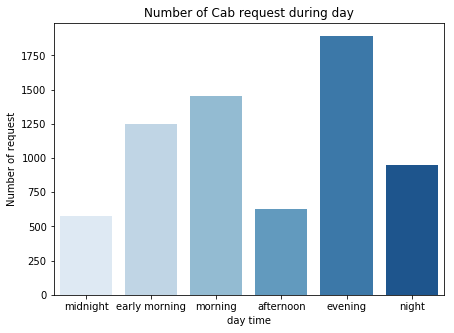

In [29]:
#Prepare a bar chart to count the number of request received during different timeslots in a day
#we have created a bar chart as we have univariate categorical varible 'Request daytime' and it would be so easy to understand this through bar chart
figure(figsize=(7,5))
order=['midnight','early morning','morning','afternoon','evening','night']
sns.countplot(data=uber,x='Request daytime',palette="Blues", order=order)
plt.title("Number of Cab request during day")
plt.ylabel("Number of request")
plt.xlabel("day time")

#### Analysis :
From the above bar chart it is clear that most of the cab requsts received are during evening followed by morning

Text(0.5,0,'day time')

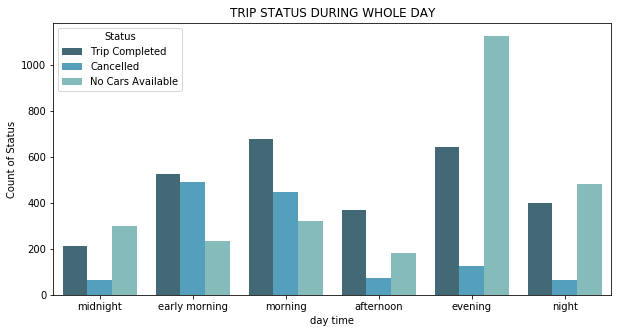

In [31]:
#Prepare a bar chart for the two bivariate categorical varibles to check the status during each timeslot
figure(figsize=(10,5))
sns.countplot(data=uber,x='Request daytime',hue='Status',palette="GnBu_d",order=order)
plt.title("TRIP STATUS DURING WHOLE DAY")
plt.ylabel("Count of Status")
plt.xlabel("day time")


### Analysis : 
From the above plot we can identify that during evening time highest number of cab unavailability status can be found and large number cancelled trip can be seen during early morning and morning time

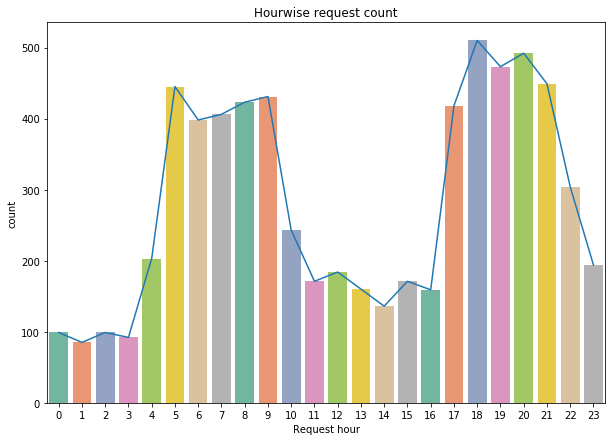

In [14]:
#Prepare a line graph with bar graph to find the number of request received during each hour
fig,line_graph=plt.subplots(figsize=(10,7))
plt.title('Hourwise request count')
uber.groupby(uber['Request hour']).count()['Request id'].plot(ax=line_graph)
sns.countplot(uber['Request hour'],palette="Set2")

It is clearly visible that during the 5,6,7,8 and 17,18,19,20,21 hours peak is high that means uber driver receives large number of ride requests during this time.

Text(0.5,0,'day time')

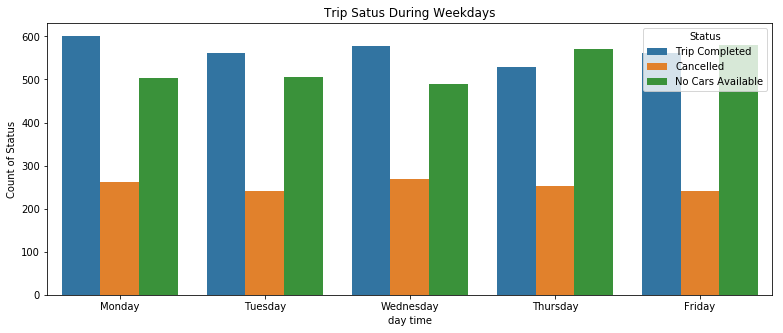

In [32]:
#plot the bar graph for two categorical variable and see the status pattern on weekdays
figure(figsize=(13,5))
sns.countplot(data=uber,x='Request day',hue='Status')
plt.title("Trip Satus During Weekdays")
plt.ylabel("Count of Status")
plt.xlabel("day time")

Above graph clearly shows that there is no significant pattern during weekdays. It is almost similar for all weekdays.

## let's dig into the data with some of the categorical variable so that we can have a good prediction

Text(0.5,0,'Pickup Point')

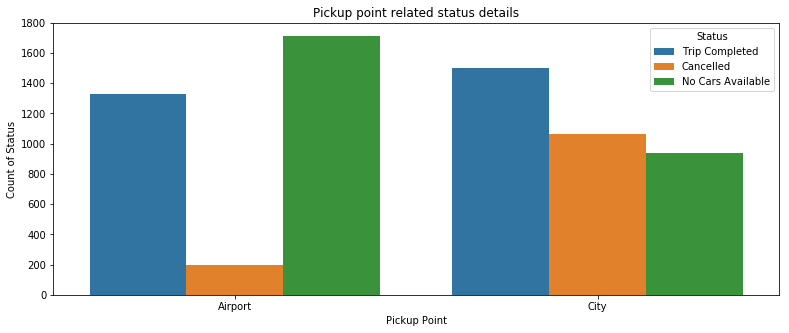

In [38]:
#plot the bar for the pickup point with the status means howmany trip completed , cancelled , No cars available for the 
#pickup point airport and city
figure(figsize=(13,5))
sns.countplot(data=uber,x='Pickup point',hue='Status')
plt.title("Pickup point related status details")
plt.ylabel("Count of Status")
plt.xlabel("Pickup Point")

No cars available ststus frequency is high for the airport however cancelation frequency is very low.Morover cancelled and no cars available status is almost same for city. 

<Figure size 1440x1440 with 0 Axes>

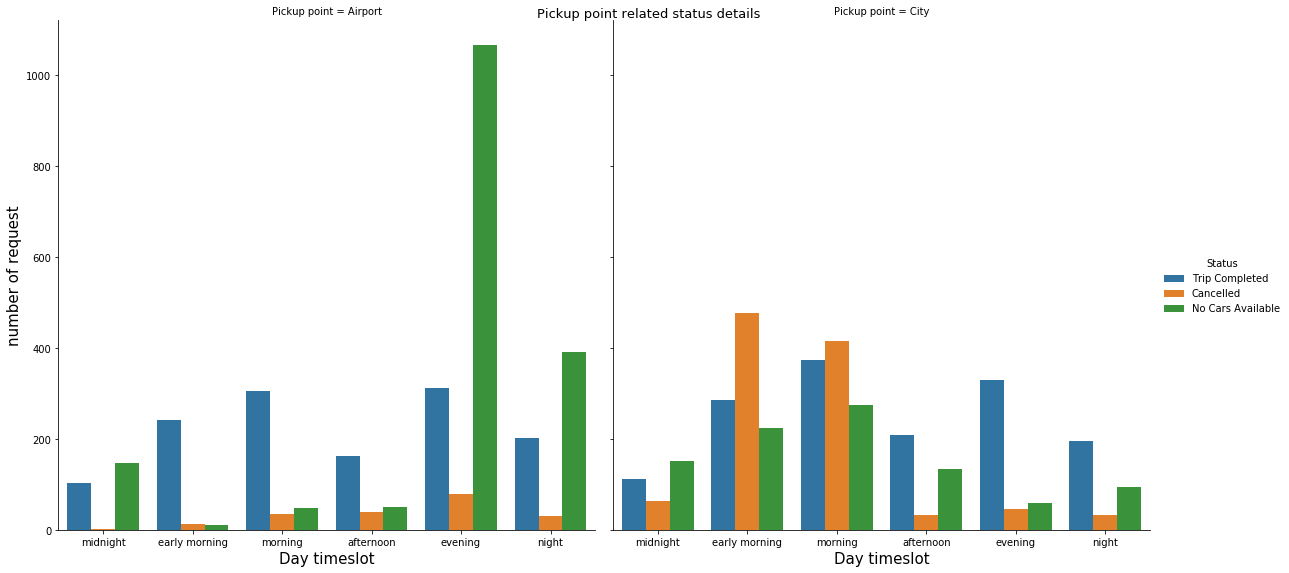

In [18]:
#plot the graph to find the status during the day slot for the pickup point city and airport
figure(figsize=(20,20))
a=sns.catplot(x ="Request daytime",hue="Status",col='Pickup point',kind="count" , height=8, aspect=1.0,data=uber, order=order)
a.fig.suptitle("Pickup point related status details",fontsize=13)
a.set_ylabels("number of request",fontsize=15)
a.set_xlabels("Day timeslot",fontsize=15)

It shows that for airport pickup evening time uber user received most number of times No cars available status.

In [43]:
#crate a new dataframe to find the demand and supply gap 
uber_supply_data=pd.DataFrame(uber[uber['Status'] =="Trip Completed"])
uber_gap_data=pd.DataFrame(uber[uber['Status'] !="Trip Completed"])

<Figure size 1440x1152 with 0 Axes>

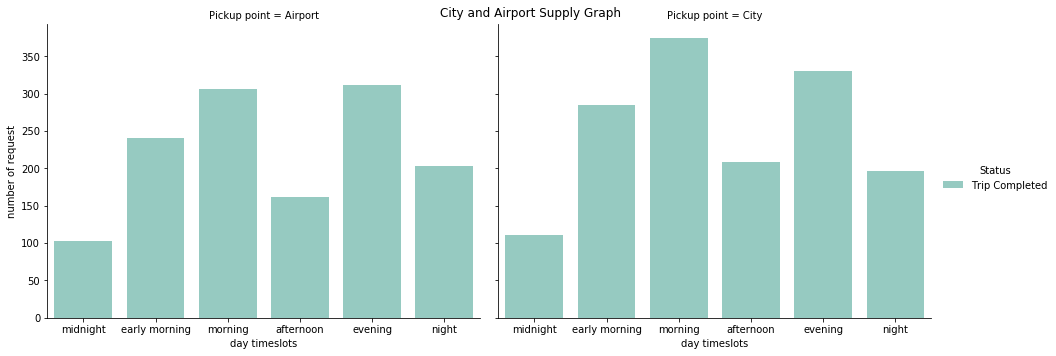

In [42]:
#plot supply graph for airport and city pickup point
figure(figsize=(20,16))
a=sns.catplot(x ="Request daytime",hue="Status",col='Pickup point',kind="count" , height=5, aspect=1.3,palette="Set3",data=uber_supply_data, order=order)
#a.title('YOUR TITLE HERE')
a.fig.suptitle("City and Airport Supply Graph")
a.set_ylabels("number of request")
a.set_xlabels("day timeslots")


for both the pickup poinnt morning and evenig supply value is high than other timeslots

<Figure size 1440x1152 with 0 Axes>

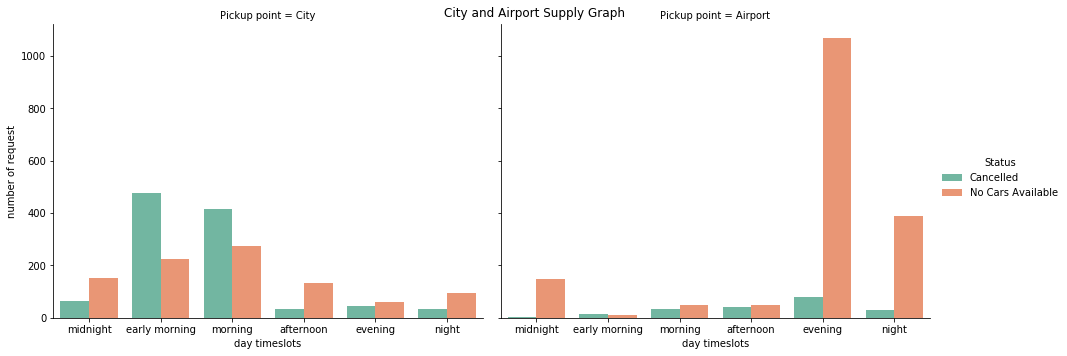

In [41]:
#find the demand gap for both pickup point with status cancelled and No cars available
figure(figsize=(20,16))
b=sns.catplot(x ="Request daytime",hue="Status",col='Pickup point',kind="count" , height=5, aspect=1.3,palette="Set2",data=uber_gap_data, order=order)
b.fig.suptitle("City and Airport Supply Graph")
b.set_ylabels("number of request")
b.set_xlabels("day timeslots")

## Step 3 : Create a column supply and demand Gap from status and analyze

In [22]:
#create a new column to find the supply and demand gap
#if the status='Trip completed' then it is considered as Supply
#if the status is other than 'Trip completed' then it is considered as demand-gap
def findsupplydemand(status):
    if status =='Trip Completed':
      return 'Supply'
    else:
      return 'Demand Gap'
uber['Supply-Demand-Gap']=uber.Status.apply(findsupplydemand)
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request date,Request time,Request hour,Request day,Request daytime,Supply-Demand-Gap
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11,11:51:00,11,Monday,morning,Supply
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11,17:57:00,17,Monday,evening,Supply
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12,09:17:00,9,Tuesday,morning,Supply
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12,21:08:00,21,Tuesday,night,Supply
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13,08:33:16,8,Wednesday,morning,Supply


<Figure size 1440x1152 with 0 Axes>

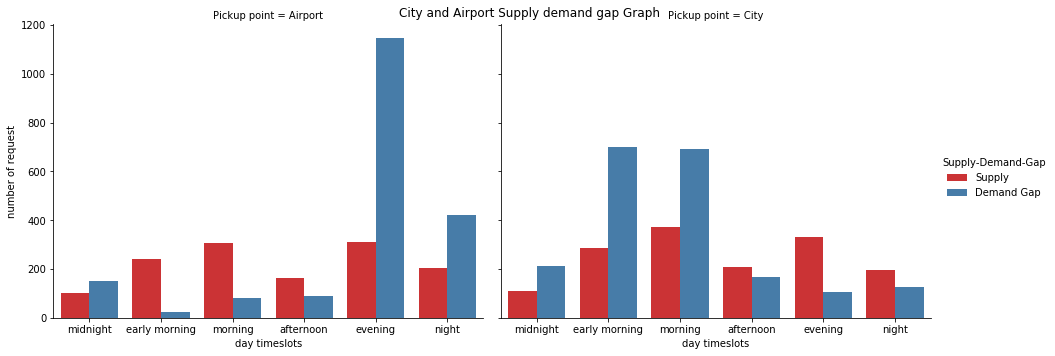

In [37]:
#plot the demand gap and supply gap fpr both city and airport
figure(figsize=(20,16))
b=sns.catplot(x ="Request daytime",hue="Supply-Demand-Gap",col='Pickup point',kind="count" , height=5, aspect=1.3,palette="Set1",data=uber, order=order)
b.fig.suptitle("City and Airport Supply demand gap Graph")
b.set_ylabels("number of request")
b.set_xlabels("day timeslots")



Analysis : Graph suggests that For airport Pickup point during evening timeslot there is a large gap. On the other hand
          for city pickup point there is a demand gap for early morning and morning time slot.

<Figure size 1440x1152 with 0 Axes>

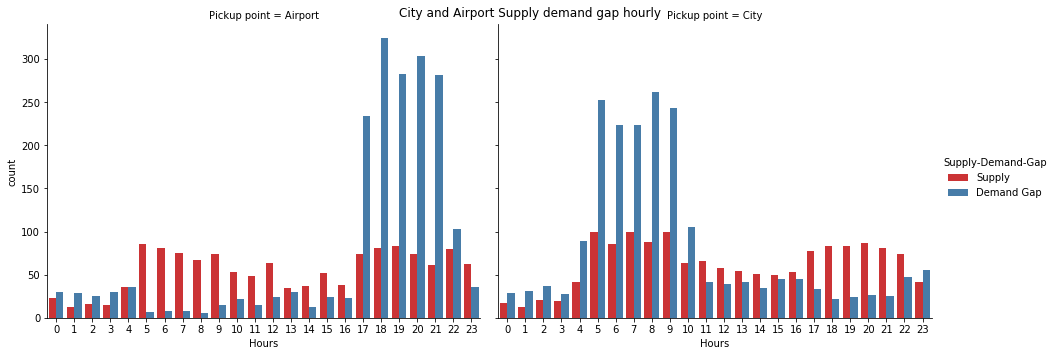

In [24]:
#lets find out during which hour there is a large demand gap for the both Pickup point
figure(figsize=(20,16))
b=sns.catplot(x ="Request hour",hue="Supply-Demand-Gap",col='Pickup point',kind="count" , height=5, aspect=1.3,palette="Set1",data=uber)
b.fig.suptitle("City and Airport Supply demand gap hourly")
b.set_xlabels("Hours")

## Conclusion :
   ##### From the above two graph it is clear that  for airport pickup point ,for evening timeslot and hour(17-21) there is a huge demand gap . On the opposite there is a huge demand gap , for morning and early morning timeslot and hour(5-9) huge gap can be seen for city pickup point
   
   #### Highest gap is for Airport pickup point during 6PM.